### Case Study 1. 서울시 자치구별 CCTV 설치 현황 분석

- Case Study의 목적
    - pandas, matplotlib, numpy 등의 기본 사용법
    - 서울시 각 구별 cctv 수를 파악하고, 인구대비 cctv 비율을 파악

In [1]:
import pandas as pd

In [4]:
import os
os.getcwd()

'C:\\Users\\theny\\bigdata\\casestudy'

In [3]:
CCTV_Seoul = pd.read_csv('../data/CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [17]:
# 첫번째 컬럼의 컬럼명 '기관명'을 '구별'로 변경해주기

CCTV_Seoul.rename(columns={'기관명':'구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [19]:
pop_Seoul = pd.read_excel('../data/population_in_Seoul.xls', encoding='UTF-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [20]:
# population_in_Seoul 파일에서는 필요한 몇 개 특정 컬럼만 가져오기
# 헤더는 중복되어있으므로 하나만 가져오기

pop_Seoul = pd.read_excel('../data/population_in_Seoul.xls',
                          header=2, #세번째 있는 걸 헤드로 하겠다!
                          usecols='B,D,G,J,N', #특정 컬럼만 사용하겠다!
                          encoding='UTF-8') #인코딩
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


- 컬럼명 변경
    1. .columns = [list]로 컬럼명 변경하기
    2. .rename을 이용, for 반복문으로 컬럼명 변경하기

In [21]:
# 1. .columns = [list]로 컬럼명 변경하기
pop_Seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [26]:
# 2. .rename을 이용, for 반복문으로 컬럼명 변경하기
# 인덱싱을 활용
names = ['구별','인구수','한국인','외국인','고령자']
num = len(names)
# for i in range(5)
for i in range(num) : 
    pop_Seoul.rename(columns={pop_Seoul.columns[i] : names[i]}, inplace=True)    

In [27]:
pop_Seoul.columns

Index(['구별', '인구수', '한국인', '외국인', '고령자'], dtype='object')

In [29]:
# 참고 
# 특정 번째 컬럼명만 변경하고 싶을 때 .rename 사용 방법
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)

In [30]:
pop_Seoul.columns

Index(['구별', '인구수', '한국인', '외국인', '고령자'], dtype='object')

In [31]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [32]:
# 소계(CCTV 수)를 기준으로 내림차순 정렬 하기

CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [33]:
#새로운 열(최근증가율)을 추가

CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2016년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [34]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [35]:
# 첫번째행(합계)을 drop

pop_Seoul.drop(0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [36]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [38]:
# '구별' 열에서 nan 있는지 확인

pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [42]:
pop_Seoul.drop(26, inplace=True)

In [46]:
pop_Seoul.tail(3)

,구별,인구수,한국인,외국인,고령자
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [47]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100

In [48]:
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

In [49]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [50]:
pop_Seoul.sort_values(by='인구수', ascending=False).head() 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [51]:
pop_Seoul.sort_values(by='외국인', ascending=False).head() 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [52]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head() 

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


### CCTV 데이터와 인구 데이터를 합쳐서 분석

In [53]:
CCTV_Seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근증가율'], dtype='object')

In [56]:
pop_Seoul.columns

Index(['구별', '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율'], dtype='object')

- '구별' 컬럼을 기준으로 merge(inner)하기

In [57]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별', how='inner')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [58]:
#분석목적(CCTV 현황 분석)상 시계열 데이터 중요하지 않으므로 일부 컬럼 삭제

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [62]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [63]:
# 자료의 특성과 시각화 등을 고려하여 '구별' 컬럼을 index로 설정

data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- 고령자 비율, 외국인 비율, 인구수 등과 CCTV를 비교하여 관계를 파악 (상관관계 분석)

In [64]:
import numpy as np

In [65]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [66]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [67]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [68]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [69]:
# matplotlib의 기본 폰트는 한글을 지원하지 않음
# matplotlib의 폰트 변경하기
# 공유받은 malgun.ttf (맑은 고딕) 폰트를 C:\fonts 디렉토리 생성 후 복사
# C:\fonts\malgun.ttf

import matplotlib.pyplot as plt
%matplotlib inline
import platform # 현재 사용하는 시스템 환경에 대한 부분을 확인하기 위한 모듈
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

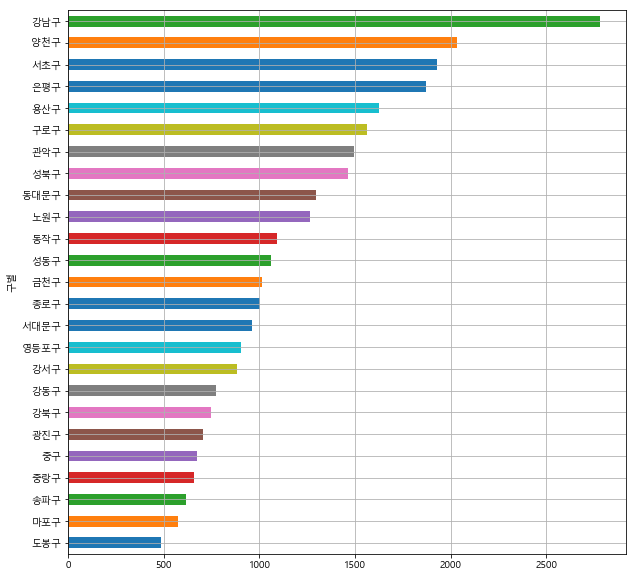

In [72]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

In [71]:
# 인구대비 CCTV 비율을 계산하여 새로운 컬럼을 추가

data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535


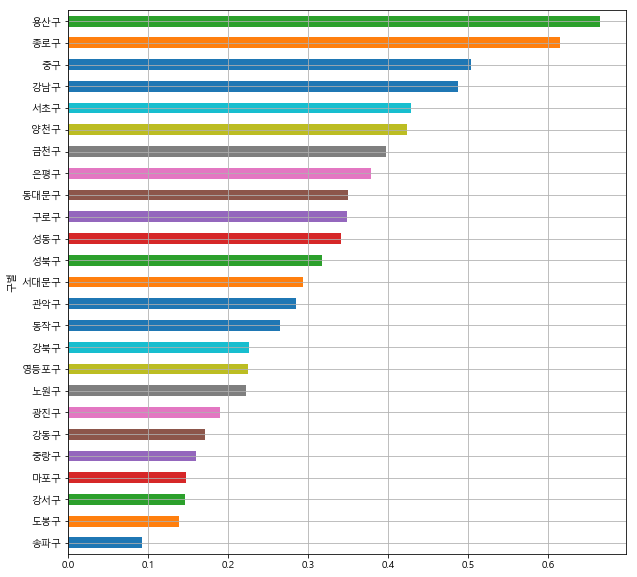

In [73]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

- 앞서, 상관계수를 통해 CCTV 수와 인구수는 약한 양의 상관관계 임을 파악하였음.
- 그 관계를 산점도를 통해 시각화를 하였음.
- 산점도에 Linear Regression Line을 추가해보자.
    - numpy의 polyfit() 함수를 통해 1차 선형회귀 함수를 생성.

In [76]:
# 변수 간 관계를 함수화하여 기울기와 절편 찾기,
# polyfit으로 계수를 찾아서, poly1d로 함수를 생성
# fp1에 인구수,소계 간 1차 함수 기울기와 절편을 저장
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

In [77]:
# numpy 의 poly1d() : 인자값으로 주어진 배열을 함수식 형태로 변환
f1 = np.poly1d(fp1)

In [78]:
# numpy의 linspace() : 배열의 시작점(1번째 인자)과 끝 점(2번째)을 균일한 간격(3번째)으로 나눈 점들을 생성
fx = np.linspace(100000,700000,100)

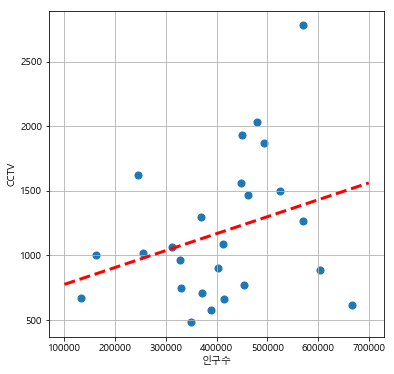

In [79]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50) # s: shape
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r') # ls:linestyle , lw:linewidth
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid() # 격자 설정
plt.show()